In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn
import scipy.stats

In [2]:
open_sd = "ca_san_diego_2020_04_01.csv"
head = pd.read_csv(open_sd,nrows = 5)

In [3]:
head

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,1,2014-01-01,01:25:00,110,24,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2,2014-01-01,05:47:00,320,42,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,3,2014-01-01,07:46:00,320,29,asian/pacific islander,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,4,2014-01-01,08:10:00,610,23,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,5,2014-01-01,08:35:00,930,35,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC


In [4]:
head.columns

Index(['raw_row_number', 'date', 'time', 'service_area', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_person', 'search_vehicle', 'search_basis', 'reason_for_search',
       'reason_for_stop', 'raw_action_taken', 'raw_subject_race_description'],
      dtype='object')

In [5]:
data = pd.read_csv(open_sd)

The Open Standford Data on San Diego is fairly well cleaned and standardized

In [6]:
len(data)

383027

In [7]:
data['subject_race'].unique()

array(['white', 'asian/pacific islander', 'hispanic', 'black', 'other',
       nan], dtype=object)

In [8]:

primary = data.loc[data['subject_race'].isin(['white','black','hispanic'])]
primary.drop(primary[primary['service_area'] == "Unknown"].index, inplace = True)
#primary['service_area'] = primary['service_area'].str.slice(0,1).astype(int)
p_search = primary.loc[primary['search_conducted']== True]
p_arrest = primary.loc[primary['arrest_made']==True]

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
#get the search, arrest, and stopped numbers and plot them side by side
# uncommenting the three lines below will get you the proportions instead of the totals
def plots(full_data,race_data,search_data, arrest_data, 
          subject_race_column, search_column, arrest_column, race_list, graph_lim = 7000):
    fig, axes = plt.subplots(nrows=1, ncols=3)

    fig.set_figwidth(18)
    
    searched = (search_data[[subject_race_column, search_column]]).groupby(
        [subject_race_column],as_index = False).count()
    totals = (race_data[[subject_race_column, search_column]]).groupby(
        [subject_race_column],as_index = False).count()
    #searched['searched'] = (searched['searched']*100)/totals['searched']
    search_plot = seaborn.barplot(data = searched, x = subject_race_column, 
                                  y = search_column, ax = axes[0])
    search_plot.set_ylim(0, graph_lim)
    
    arrested = (arrest_data[[subject_race_column, arrest_column]]).groupby(
        [subject_race_column],as_index = False).count()
    totals = (race_data[[subject_race_column, arrest_column]]).groupby(
        [subject_race_column],as_index = False).count()
    #arrested['arrested'] = (arrested['arrested']*100)/totals['arrested']
    arrest_plot = seaborn.barplot(data = arrested, x = subject_race_column,
                                  y = arrest_column,ax = axes[1])
    arrest_plot.set_ylim(0, graph_lim)
    
    totals = (full_data[[subject_race_column, arrest_column]]).groupby(
        [subject_race_column],as_index = False).count()
    #totals['arrested'] = (totals['arrested'] * 100)/sum(totals['arrested'])
    totals = totals.loc[totals[subject_race_column].isin(race_list)]
    totals = totals.rename({arrest_column:'stops'},axis='columns')
    seaborn.barplot(data = totals, x = subject_race_column, y = 'stops')
    
def plots_percents(full_data,race_data,search_data, arrest_data, 
                   subject_race_column, search_column, arrest_column, race_list, graph_lim = 10):
    fig, axes = plt.subplots(nrows=1, ncols=3)

    fig.set_figwidth(18)
    
    searched = (search_data[[subject_race_column, search_column]]).groupby(
        [subject_race_column],as_index = False).count()
    totals = (race_data[[subject_race_column, search_column]]).groupby(
        [subject_race_column],as_index = False).count()
    searched[search_column] = (searched[search_column]*100)/totals[search_column]
    search_plot = seaborn.barplot(data = searched, x = subject_race_column,
                                  y = search_column, ax = axes[0])
    search_plot.set_ylim(0, graph_lim)
    
    arrested = (arrest_data[[subject_race_column, arrest_column]]).groupby(
        [subject_race_column],as_index = False).count()
    totals = (race_data[[subject_race_column, arrest_column]]).groupby(
        [subject_race_column],as_index = False).count()
    arrested[arrest_column] = (arrested[arrest_column]*100)/totals[arrest_column]
    arrest_plot = seaborn.barplot(data = arrested, x = subject_race_column,
                                  y = arrest_column,ax = axes[1])
    arrest_plot.set_ylim(0, graph_lim)
    
    totals = (full_data[[subject_race_column, arrest_column]]).groupby(
        [subject_race_column],as_index = False).count()
    totals[arrest_column] = (totals[arrest_column] * 100)/sum(totals[arrest_column])
    totals = totals.loc[totals[subject_race_column].isin(race_list)]
    totals = totals.rename({arrest_column:'stops'},axis='columns')
    seaborn.barplot(data = totals, x = subject_race_column, y = 'stops')

In [10]:
len(primary)

312260

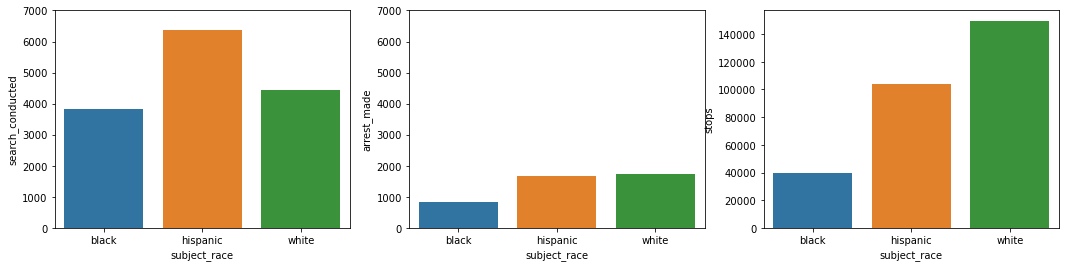

In [11]:
races = ['white','black','hispanic']
plots(data,primary, p_search, p_arrest, 'subject_race',
      'search_conducted','arrest_made', races)


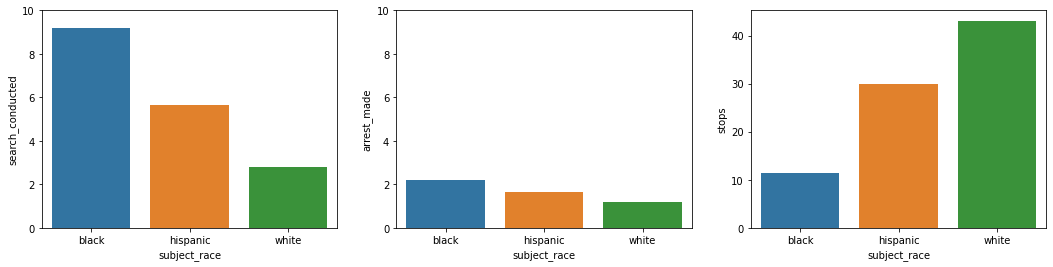

In [12]:
plots_percents(data,primary, p_search, p_arrest, 'subject_race',
               'search_conducted','arrest_made', races)

In [13]:

pd_beats ="pd_beats_datasd.shx"
gdf = geopandas.read_file(pd_beats)


In [15]:
service = gdf[['serv','geometry']]
service = service.dissolve(by ='serv',aggfunc ='sum',as_index = False)
service = service.rename({'serv':'service_area'},axis='columns')

In [16]:
def geo_plots(area_data, race_data,search_data, arrest_data, area_column, 
              subject_race_column, search_column, arrest_column, race_list):
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_figwidth(18)
    fig.set_figheight(9)
          
    searched = (search_data[[area_column,search_column]]).groupby([area_column],
                                                                  as_index = False).count()
    totals = (race_data[[area_column,search_column]]).groupby([area_column],
                                                              as_index = False).count()
    test = searched.merge(totals, on = area_column)
    # uncomment next line to get percent arrested
    # test[search_column] = (test[search_column + '_x']*100)/test[search_column + '_y']
    test[search_column] = test[search_column +'_x']
    test = test.loc[test[area_column]!='Unknown']
    test[area_column] = test[area_column].astype(int)
    joined = area_data.merge(test, on = area_column)
    fig0 = joined.plot(column = search_column, legend = True, ax = axes[0])
    fig0.set_title('Searched')
    
    arrested = (arrest_data[[area_column,arrest_column]]).groupby([area_column],
                                                                  as_index = False).count()
    totals = (race_data[[area_column,arrest_column]]).groupby([area_column],
                                                              as_index = False).count()
    test = arrested.merge(totals, on = area_column)
    # uncomment next line to get percent arrested
    # test[arrest_column] = (test[arrest_column + '_x']*100)/test[arrest_column + '_y']
    test[arrest_column] = test[arrest_column +'_x']
    test = test.loc[test[area_column]!='Unknown']
    test[area_column] = test[area_column].astype(int)
    joined = area_data.merge(test, on = area_column)
    fig1 = joined.plot(column = arrest_column, legend = True, ax = axes[1])
    fig1.set_title('Arrested')

    totals = (race_data[[subject_race_column,area_column]]).groupby([area_column],
                                                                    as_index = False).count()
    #totals['subject_race'] = (totals['subject_race'] * 100)/sum(totals['subject_race'])
    totals = totals.loc[totals[area_column]!='Unknown']
    #seaborn.barplot(data = totals, x ='service_area', y = 'subject_race')
    totals[area_column] = totals[area_column].astype(int)
    joined = area_data.merge(totals, on = area_column)
    fig2 = joined.plot(column = subject_race_column, legend = True, ax = axes[2])
    fig2.set_title('Stopped')
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')


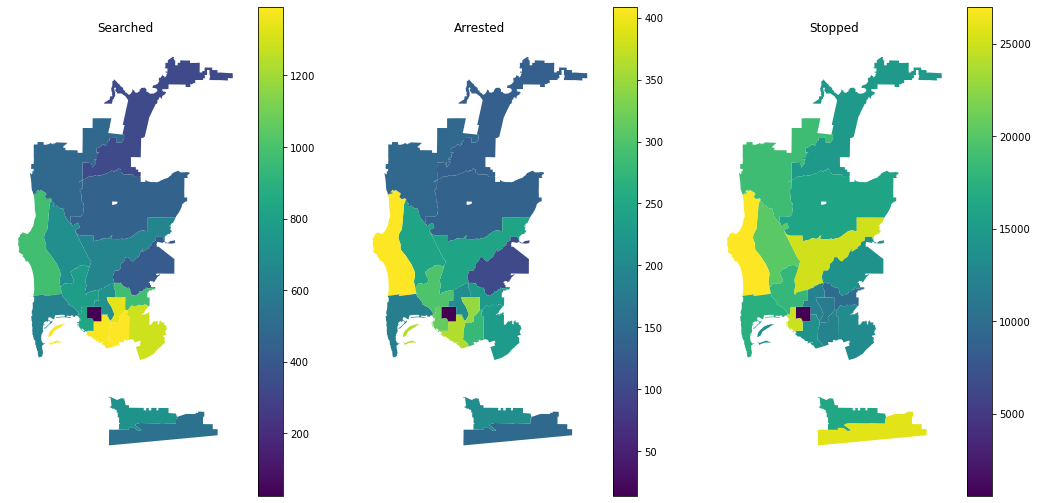

In [17]:
geo_plots(service,primary, p_search, p_arrest,'service_area', 
          'subject_race','search_conducted','arrest_made', races)

In [18]:
#url = "CA_block_2010.shx"
#census_gdf = geopandas.read_file(url,nrows = 5)
#income = "Income_by_Location.csv"
#income_data = pd.read_csv(income)

In [21]:
#pd_beats ="divisions_datasd.shp"
#gdf = geopandas.read_file(pd_beats)

In [22]:
census_file = "nhgis0002_ds176_20105_blck_grp.csv"
use = ['GISJOIN','COUNTY','JMBE001','JMBE002','JMBE003','JMBM001','JMBM002','JMBM003']
census_df = pd.read_csv(census_file, usecols = use)
census_df = census_df.loc[census_df['COUNTY'] == 'San Diego County']


census_df = census_df.groupby(['GISJOIN'],as_index = False).sum()


In [23]:
url = "CA_block_2010.shx"
census_gdf = geopandas.read_file(url)
census_shape = census_gdf[['GISJOIN','geometry']]

census_shape['GISJOIN'] = census_shape['GISJOIN'].str.slice(stop = 15)

census_joined = census_shape.merge(census_df, on = 'GISJOIN')
census_joined = census_joined.to_crs(epsg = 2230)

/home/lkuo/.local/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [24]:
test = census_joined.sjoin(service, how = 'inner')
test['full_area'] = test['geometry'].area
overlayed = geopandas.overlay(test,service)

In [25]:
overlayed['inter_area'] = overlayed['geometry'].area
overlayed['prop'] = overlayed['inter_area']/overlayed['full_area']
overlayed['JMBE001'] = overlayed['JMBE001'] * overlayed['prop']
overlayed['JMBE002'] = overlayed['JMBE002'] * overlayed['prop']
overlayed['JMBE003'] = overlayed['JMBE003'] * overlayed['prop']

overlayed['JMBM001'] = overlayed['JMBM001'] * overlayed['prop']
overlayed['JMBM002'] = overlayed['JMBM002'] * overlayed['prop']
overlayed['JMBM003'] = overlayed['JMBM003'] * overlayed['prop']

overlayed['White %'] = overlayed['JMBE002']/overlayed['JMBE001']
overlayed['Black %'] = overlayed['JMBE003']/overlayed['JMBE001']

test3 = overlayed.dissolve(by='service_area_2', aggfunc='sum', as_index = False)

(6233274.704870715, 6482014.806768063, 1764981.7294078567, 1996549.6914567687)

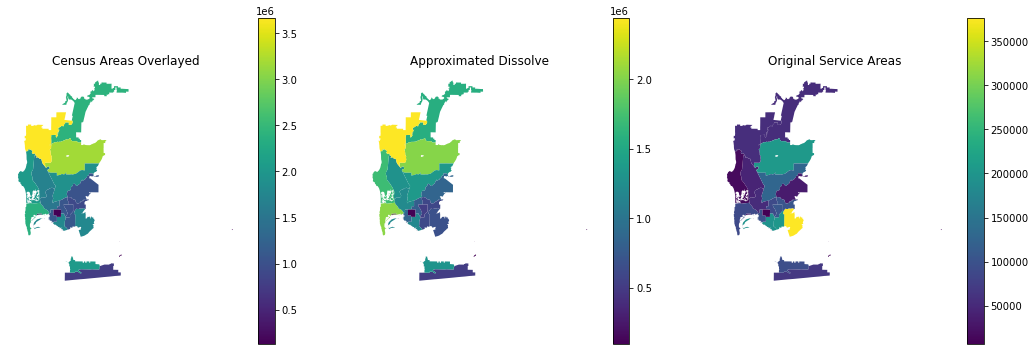

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3)

fig.set_figwidth(18)
fig.set_figheight(6)


fig0 = test3.plot(column = 'JMBE001', legend = True, ax = axes[0])

fig1 = test3.plot(column = 'JMBE002', legend = True, ax = axes[1])

fig2 = test3.plot(column = 'JMBE003', legend = True, ax = axes[2])

fig0.set_title('Census Areas Overlayed')
fig1.set_title('Approximated Dissolve')
fig2.set_title('Original Service Areas')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')